# 初期値の影響(Heの初期値)
     
* 初期値を適度にバラつかせる方法として、Kaiming Heらが提案する方法がある。
* Heの方法では、$\displaystyle \sqrt \frac{2}{n1}$を標準偏差とする。ここで、n1は前の層のノード数である。 Xavierの初期値にくらべ、広がりを持った初期値になる。
* 以下のシミュレーションでは、ReLU関数を使っていることに注意!!!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from common.activations import relu
np.random.seed(1234)

### [演習]
* Heの初期値を利用するための以下の関数を完成させましょう
* def heのreturnに1行で書けます

In [2]:
def he(n1, n2):
    """
    Heの初期値を利用するための関数
    返り値は、見かけの標準偏差
    """    
    return np.sqrt(2/n1)

In [3]:
def xavier(n1, n2):
    """
    Xavierの初期値を利用するための関数
    返り値は、見かけの標準偏差
    """
    return np.sqrt(2/(n1+n2))   


def simulation(fsigma, num_in=100, num_x=1000, hidden_layer_size=5, num_node=100):
    """
    fsigma : 標準偏差を決めるための関数
    num_in : 入力層のノードの数
    num_x : 入力するデータの数
    hidden_layer_size : 中間層の層数
    num_node : 中間層のノード数
    sigma : 乱数を抽出する際に用いる正規分布の標準偏差
    """
    # num_in次元のデータをnum_x個つくる
    X = np.random.randn(num_x, num_in) # 標準正規分布からのサンプリング

    # 中間層ノードの値を格納するdict
    h = {}

    # 順伝播の計算
    for i in range(hidden_layer_size):
        if i==0:
            X_ = X
            n1 = num_in
        else:
            X_ = h[i-1]
            n1 = num_node
        
        n2 = num_node
        sigma = fsigma(n1, n2)

        # 重みの初期化
        W = np.random.randn(num_node, num_node) * sigma

        # 行列の積
        z = np.dot(X_, W)

        # 活性化関数に入れる
        a = relu(z)

        # dictに格納
        h[i] = a

    return h

def histgram(h, ymax = 50000):
    plt.figure(figsize=(14,4))
    fig_num = len(h)
    for key,value in h.items():
        plt.subplot(1,fig_num, key+1)
        plt.title("hiddlen_layer=%s"%(key+1))
        plt.hist(value.flatten(), bins=70)
        plt.ylim([0, ymax])
        plt.xlim([0,3.0])
        if key!=0:
            plt.yticks([], [])
    plt.show()

## Xavierの初期値でサンプリングした場合

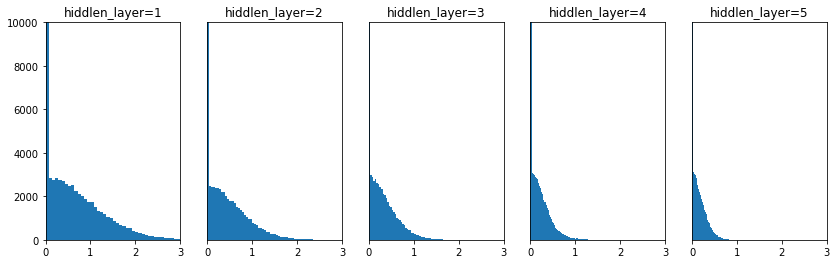

In [4]:
# 実験
n = 100
h = simulation(fsigma=xavier, num_in=n, num_node=n)

# アクティベーションのヒストグラムを中間層ごとに描く
histgram(h, ymax=10000)

## Heの初期値でサンプリングした場合

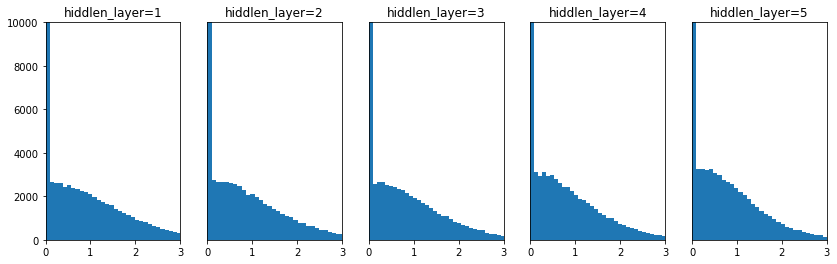

In [5]:
# 実験
n = 100
h = simulation(fsigma=he, num_in=n, num_node=n)

# アクティベーションのヒストグラムを中間層ごとに描く
histgram(h, ymax=10000)

* Xavierの初期値に比べ、0側への偏りが緩和された

## Heの初期値にて、n数が大きくなった場合の確認

n=200


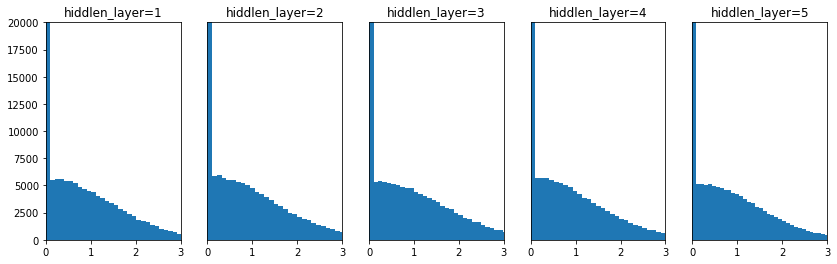

n=500


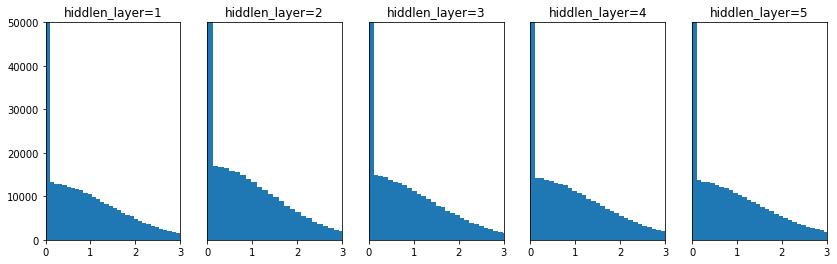

n=1000


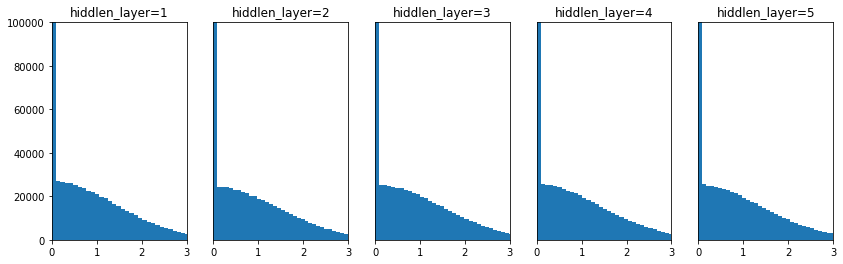

n=10000


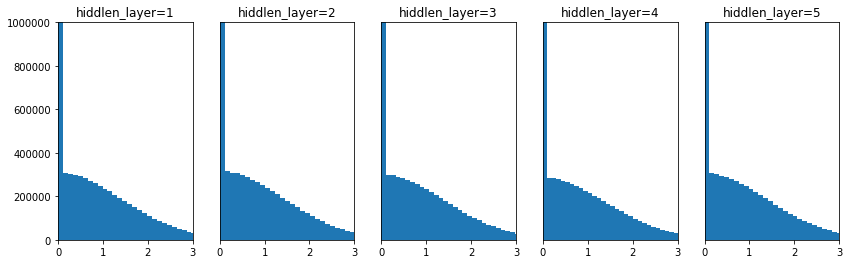

In [6]:
for n in [200, 500, 1000, 10000]:
    print("n=%s"%n)
    
    # 実験
    h = simulation(fsigma=he, num_in=n, num_node=n)

    # アクティベーションのヒストグラムを中間層ごとに描く
    histgram(h, ymax=100*n)

### [演習]
* Heの初期値とXavierの初期値を比較し、それぞれの特徴を考察しましょう

### [まとめ]
* Heの初期値は、Xavierの初期値よりも広がりを持った初期値になる。
* 一般に、ReLU関数では、XavierよりもHeの初期値を用いる方が学習がうまくいくと言われている。
* Xavierの初期値やHeの初期値以外にも重みを初期化する手法はいくつも提案されているため、問題にあわせていろいろ試してみるのがよい。